# 惑星の質量・半径のデータ


*   元データは NASA Exoplanet Archive https://exoplanetarchive.ipac.caltech.edu から取得
*   ただし質量または半径の測定精度が悪いものは除いた



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 日本語も使えるようにしておく。
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=2de8118d185e22395e5ba2330e9eb4cd63f312bfabe5fb9c9a05d87ba208c396
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


## 系外惑星の質量・半径のデータ

データはこれまで通りpandasで読み込む。

In [3]:
import pandas as pd

In [4]:
d = pd.read_csv("mass_radius.txt")

In [5]:
d

,name,mass,radius
0,55 Cnc e,7.99000,1.875
1,CoRoT-1 b,327.35000,16.700
2,CoRoT-10 b,874.00000,10.870
3,CoRoT-11 b,740.51000,16.030
4,CoRoT-12 b,291.43800,16.140
...,...,...,...
770,XO-2 N b,179.89178,11.131
771,XO-3 b,2316.98070,15.805
772,XO-4 b,451.31860,14.011
773,XO-5 b,378.20000,12.780


nameは惑星名、massは惑星の質量（地球との比）、radiusは惑星の半径（地球との比）である。以下のようにm, rを取り出しておこう。

In [6]:
# 一行ずつ m = ..., r = ... とやってもいいがこのようにまとめて書くこともできる。
m, r = np.array(d["mass"]), np.array(d["radius"])

上の例に倣って、縦軸を半径r, 横軸を質量mとして、両対数グラフに点でプロットしてみよう。x軸、y軸のラベルも適切につけること。

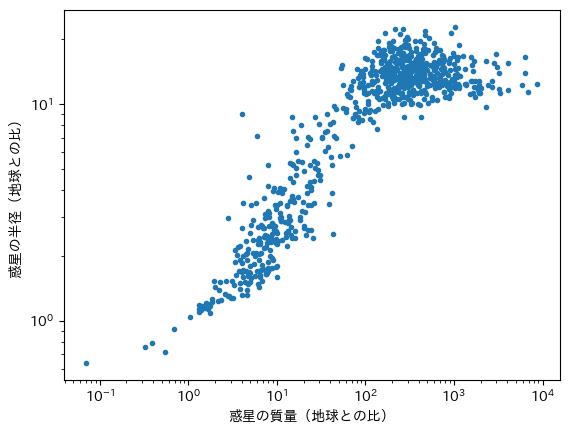

In [7]:
plt.xlabel("惑星の質量（地球との比）")
plt.ylabel("惑星の半径（地球との比）")
plt.xscale("log")
plt.yscale("log")
plt.plot(m, r, ".");

このグラフに太陽系の惑星データを加えてみよう。これらのデータは上で読み込んだmass_radius.txtには入っていないので、自分で配列を定義する必要がある。講義の補足資料表1または第10回スライド（最後から3ページ目）を参考に、自分で配列を作ってプロットに加えてみよう。**今は惑星質量・半径ともに地球との比を考えていることに注意する。**系外惑星のデータとは異なるマーカーを用い、系外惑星と太陽系の惑星それぞれに凡例をつけること。太陽系の惑星と比べてどのような範囲にあるか？

In [8]:
m_sun = [0.055, 0.82, 1, 0.11, 318, 95, 14.5, 17]
r_sun = [0.38, 0.95, 1, 0.53, 11.2, 9.4, 4.0, 3.9]

<ipython-input-9-8686e03f0d4d>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星") # mfc="none"にすると中が空白になる


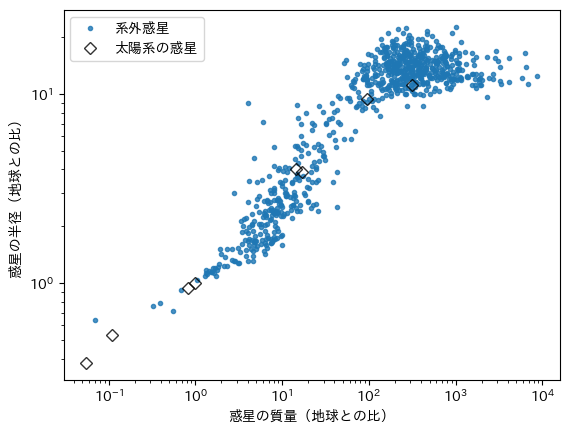

In [9]:
plt.xlabel("惑星の質量（地球との比）")
plt.ylabel("惑星の半径（地球との比）")
plt.xscale("log")
plt.yscale("log")
plt.plot(m, r, ".", label="系外惑星", alpha=0.8)
plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星") # mfc="none"にすると中が空白になる
plt.legend(loc="best");

次にスーパーアース・ミニネプチューンのような小さめの惑星に注目しよう。質量の範囲を（例えば）地球の0.5倍以上30倍以下、半径を例えば地球の0.8倍から4.5倍以下にしてみよう。

<ipython-input-10-f458bcb855dd>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星")


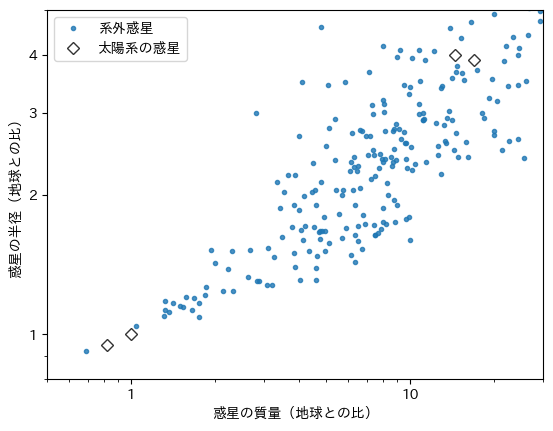

In [10]:
plt.xlim(0.5, 30)
plt.ylim(0.8, 5)
plt.xlabel("惑星の質量（地球との比）")
plt.ylabel("惑星の半径（地球との比）")
plt.xscale("log")
plt.yscale("log")
plt.plot(m, r, ".", label="系外惑星", alpha=0.8)
plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星")
plt.yticks([1,2,3,4], [1,2,3,4]) # y軸ラベルの数字の表記変更
plt.xticks([1,10], [1,10]) # x軸ラベルの数字の表記変更
plt.legend(loc="best");

太陽系の地球（どれか？）にもかなり近い惑星がある一方、地球と海王星または天王星（どれか？）の間にも様々な惑星がある。これらの惑星の組成を最も簡単に議論する方法は、惑星の平均密度を調べることである。このグラフ上に、

* 地球と同じ平均密度（$5.5\,\mathrm{g/cm^3}$）
* 水と同じ平均密度（$1\,\mathrm{g/cm^3}$）

の線を書き加えて系外惑星や太陽系の惑星と比較してみよう（第10回スライドの最後から2ページ目も参照）。

In [11]:
x = np.logspace(-1, 2, 1000)

などとすると、$10^{-1}=0.1$から$10^2=100$の間で対数グラフ上で等間隔に並んだ配列が作れるので使うとよい。

<ipython-input-12-99f95b69ed97>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星")


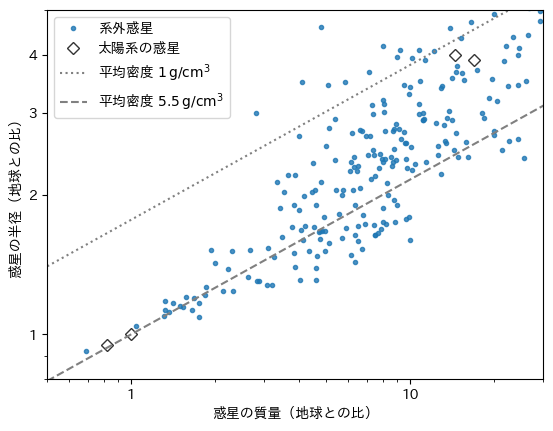

In [12]:
plt.xlim(0.5, 30)
plt.ylim(0.8, 5)
plt.xlabel("惑星の質量（地球との比）")
plt.ylabel("惑星の半径（地球との比）")
plt.xscale("log")
plt.yscale("log")
plt.plot(m, r, ".", label="系外惑星", alpha=0.8)
plt.plot(m_sun, r_sun, ".", marker="D", color='black', alpha=0.8, mfc="none", label="太陽系の惑星")
plt.plot(x, (x*5.5)**(1./3.), label='平均密度 $1\,\mathrm{g/cm^3}$', color='gray', ls='dotted')
plt.plot(x, x**(1./3.), label='平均密度 $5.5\,\mathrm{g/cm^3}$', color='gray', ls='dashed')
plt.yticks([1,2,3,4], [1,2,3,4]) # y軸ラベルの数字の表記変更
plt.xticks([1,10], [1,10]) # x軸ラベルの数字の表記変更
plt.legend(loc="best");